#<h1><center>Lab 4 - A4</center></h1>

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time
import pickle as pk
# Importuri legate de sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, Normalizer
from sklearn.model_selection import cross_validate, train_test_split

In [ ]:
# Importuri utile pentru tensorflow
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers

# Importuri utile pentru pytorch
#import torch
#import torch.nn as nn
#import torch.nn.functional as F
#import torch.optim as optim

## Lucru în timpul laboratorului

1.	Completarea de cod în fișierul Jupyter Notebook (A4.ipynb) unde este notat cu TODO:
 1.	Despărțirea seturilor de date în train și test (5p)
 1.	Normalizarea datelor (10p)
 1.	Completarea de cod pentru arborele de decizie (10)
 1.	Completarea de cod pentru funcția de cross-over a arborelui de decizie și antrenarea acestuia (20p)
 1.	Completarea de cod pentru rețeaua neuronală (10)
 1.	Completarea de cod pentru funcția de cross-over a rețelei neuronale și antrenarea acesteia (20p)

Punctele se împart în mod egal între problemele de clasificare (Iris) și regresie (Diabetes) pentru fiecare subpunct de la punctul 1.

**Total Punctaj A4-Lab = 75p**

**Deadline Lab 4**


### Clasificare - Iris

### Utils

In [ ]:
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score, average='weighted'),
           'recall' : make_scorer(recall_score, average='weighted'),
           'f1_score' : make_scorer(f1_score, average='weighted')}
def get_score_mean(scores):
  for method in scores:
      scores[method] = np.mean(scores[method])

#### Încărcare și separare date

In [ ]:
# Re-rulați începând de la această celulă dacă apar erori de nerezolvat la date
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
print(X[:5])
print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


#### Normalizarea datelor și separarea datelor

In [ ]:
# TODO: Aplică un scaler la alegere pentru datele de intrare
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/1.6/modules/generated/sklearn.preprocessing.Normalizer.html
scaler = StandardScaler() # TODO: Inițializează scaler
X = scaler.fit_transform(X) # TODO: Aplica scaler pe datele de intrare

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # TODO: Aplică separarea pe train și test utilizând sklearn
# https://scikit-learn.org/1.6/modules/generated/sklearn.model_selection.train_test_split.html

#### Pregătire model și cross-validation

##### Arbore de decizie

In [ ]:
def get_score_dt(X, y, max_leaf_nodes, scoring):
    """
    Funcție pentru a obține mai multe scoruri folosind un arbore de decizie.
    Astfel putem evalua și setul de date
    """
    my_pipeline = Pipeline(steps=[
                              ('model', DecisionTreeClassifier(
                                  max_leaf_nodes=max_leaf_nodes,
                                  random_state=1, class_weight='balanced'))
                             ]) # TODO: Completare cod cu datele corecte unde este None
    scores = cross_validate(my_pipeline, X=X, y=y,
                            cv=5, scoring=scoring,
                            return_train_score=True, error_score='raise') # TODO: Completare cod cu datele corecte unde este None
    get_score_mean(scores)
    return scores

In [ ]:
# Verificarea codului de mai sus
results = {}
for i in [5, 10, 50, 100, 500, 1000]:
    results[i] = get_score_dt(x_train, y_train, i, scoring)

best_no_leafs = 5
for result in results:
  if results[result]['test_accuracy'] > results[best_no_leafs]['test_accuracy']:
    best_no_leafs = result
  print(result)
  print(results[result])

5
{'fit_time': np.float64(0.0029546260833740235), 'score_time': np.float64(0.008426141738891602), 'test_accuracy': np.float64(0.9333333333333333), 'train_accuracy': np.float64(0.9738095238095239), 'test_precision': np.float64(0.941005291005291), 'train_precision': np.float64(0.9743442449282271), 'test_recall': np.float64(0.9333333333333333), 'train_recall': np.float64(0.9738095238095239), 'test_f1_score': np.float64(0.9330282369357998), 'train_f1_score': np.float64(0.9738048024043655)}
10
{'fit_time': np.float64(0.0021225929260253905), 'score_time': np.float64(0.006742048263549805), 'test_accuracy': np.float64(0.9333333333333333), 'train_accuracy': np.float64(1.0), 'test_precision': np.float64(0.941005291005291), 'train_precision': np.float64(1.0), 'test_recall': np.float64(0.9333333333333333), 'train_recall': np.float64(1.0), 'test_f1_score': np.float64(0.9330282369357998), 'train_f1_score': np.float64(1.0)}
50
{'fit_time': np.float64(0.0020950794219970702), 'score_time': np.float64(0

In [ ]:
my_pipeline = Pipeline(steps=[
    ('model', DecisionTreeClassifier(
        max_leaf_nodes=best_no_leafs,
        random_state=1,
        class_weight='balanced'))
])
my_pipeline.fit(x_train, y_train) # TODO: Aplică funcția fit pentru pipeline
trained_decision_tree = my_pipeline['model']
y_pred = trained_decision_tree.predict(x_test)

In [ ]:
# salvează model
with open(f'path.pickle', 'wb') as handle:
    pk.dump(trained_decision_tree, handle, protocol=pk.HIGHEST_PROTOCOL)

In [ ]:
# încarcă model
with open(f'path.pickle', 'rb') as handle:
    trained_decision_tree = pk.load(handle)

##### Rețea neuronală

In [ ]:
def get_score_mlp(X, y, n_hidden_layers, scoring):
    """
    Funcție pentru a obține mai multe scoruri folosind o rețea neuronală.
    Astfel putem evalua și setul de date
    """
    hidden_layer_sizes = tuple([10] * n_hidden_layers)
    my_pipeline = Pipeline(steps=[
                              ('model', MLPClassifier(solver='lbfgs', alpha=1e-5,
                                                      hidden_layer_sizes=hidden_layer_sizes,
                                                      random_state=1, max_iter=100))
                             ]) # TODO: Completare cod cu datele corecte unde este None
    scores = cross_validate(my_pipeline, X, y,
                            cv=5, scoring=scoring,
                            return_train_score=True,
                            error_score='raise')
                            # TODO: # TODO: Completare cod cu datele corecte unde este None
    get_score_mean(scores)
    return scores

In [ ]:
# Verificarea codului de mai sus
results = {}
for i in [1, 2, 3, 4, 5, 6]:
    results[i] = get_score_mlp(x_train, y_train, i, scoring)

best_no_hidden_layers = 1
for result in results:
  if results[result]['test_accuracy'] > results[best_no_hidden_layers]['test_accuracy']:
    best_no_hidden_layers = result
  print(result)
  print(results[result])

1
{'fit_time': np.float64(0.023615312576293946), 'score_time': np.float64(0.00722346305847168), 'test_accuracy': np.float64(0.9333333333333333), 'train_accuracy': np.float64(0.9952380952380953), 'test_precision': np.float64(0.9424338624338624), 'train_precision': np.float64(0.9952380952380953), 'test_recall': np.float64(0.9333333333333333), 'train_recall': np.float64(0.9952380952380953), 'test_f1_score': np.float64(0.9331759199406259), 'train_f1_score': np.float64(0.9952380952380953)}
2
{'fit_time': np.float64(0.029997873306274413), 'score_time': np.float64(0.00907120704650879), 'test_accuracy': np.float64(0.9428571428571428), 'train_accuracy': np.float64(0.9952380952380953), 'test_precision': np.float64(0.9531481481481482), 'train_precision': np.float64(0.9952380952380953), 'test_recall': np.float64(0.9428571428571428), 'train_recall': np.float64(0.9952380952380953), 'test_f1_score': np.float64(0.942022945930509), 'train_f1_score': np.float64(0.9952380952380953)}
3
{'fit_time': np.flo

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
my_pipeline = my_pipeline = Pipeline(steps=[
    ('model', MLPClassifier(solver='lbfgs', alpha=1e-5,
                            hidden_layer_sizes=best_no_hidden_layers,
                            random_state=1, max_iter=100))
])
my_pipeline.fit(x_train, y_train)
trained_mlp = my_pipeline['model']
y_pred = trained_mlp.predict(x_test)

In [ ]:
# salvează model
with open(f'path.pickle', 'wb') as handle:
    pk.dump(trained_mlp, handle, protocol=pk.HIGHEST_PROTOCOL)

In [ ]:
# încarcă model
with open(f'path.pickle', 'rb') as handle:
    trained_mlp = pk.load(handle)

### Regresie - Diabetes

#### Utils

In [ ]:
# Funcții pentru a obține acuratețea
scoring = {'mse' : make_scorer(mean_squared_error),
           'r2' : make_scorer(r2_score)}
def get_score_mean(scores):
  for method in scores:
      scores[method] = np.mean(scores[method])

#### Încărcare și separare date

In [ ]:
# Re-rulați începând de la această celulă dacă apar erori de nerezolvat la date
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [ ]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [ ]:
print(X[:5])
print(y[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


#### Normalizarea datelor și separarea datelor

In [ ]:
# TODO: Aplică un scaler la alegere pentru datele de intrare
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/1.6/modules/generated/sklearn.preprocessing.Normalizer.html
scaler = StandardScaler() # TODO: Inițializează scaler
X = scaler.fit_transform(X) # TODO: Aplica scaler pe datele de intrare

x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42)# TODO: Aplică separarea pe train și test utilizând sklearn
# https://scikit-learn.org/1.6/modules/generated/sklearn.model_selection.train_test_split.html

#### Pregătire model și cross-over

##### Arbore de decizie

In [ ]:
def get_score_dt(X, y, max_leaf_nodes, scoring):
    """
    Funcție pentru a obține mai multe scoruri folosind un arbore de decizie.
    Astfel putem evalua și setul de date
    """
    my_pipeline = Pipeline(steps=[
                              ('model', DecisionTreeRegressor(
                                  max_leaf_nodes=max_leaf_nodes,
                                  random_state=1))
                             ]) # TODO: Completare cod cu datele corecte unde este None
    scores = cross_validate(my_pipeline, X=X, y=y,
                            cv=5, scoring=scoring,
                            return_train_score=True, error_score='raise')  # TODO: Completare cod cu datele corecte unde este None
    get_score_mean(scores)
    return scores

In [ ]:
# Verificarea codului de mai sus
results = {}
for i in [5, 10, 50, 100, 500, 1000]:
    results[i] = get_score_dt(x_train, y_train, i, scoring)

best_no_leafs = 5
for result in results:
  if results[result]['test_r2'] > results[best_no_leafs]['test_r2']: # TODO: Alege metrica pe baza căreia să se compare
    best_no_leafs = result
  print(result)
  print(results[result])

5
{'fit_time': np.float64(0.0031175613403320312), 'score_time': np.float64(0.0019525527954101563), 'test_mse': np.float64(4047.7040044567198), 'train_mse': np.float64(3152.580323807637), 'test_r2': np.float64(0.3043986774261417), 'train_r2': np.float64(0.48561410575418373)}
10
{'fit_time': np.float64(0.002317523956298828), 'score_time': np.float64(0.0026166439056396484), 'test_mse': np.float64(4001.028958491329), 'train_mse': np.float64(2504.1648648268456), 'test_r2': np.float64(0.3130231123579805), 'train_r2': np.float64(0.5909975895524135)}
50
{'fit_time': np.float64(0.0029506683349609375), 'score_time': np.float64(0.0018105506896972656), 'test_mse': np.float64(5563.630610397755), 'train_mse': np.float64(602.5846598846633), 'test_r2': np.float64(0.05423827712260791), 'train_r2': np.float64(0.9015030261364165)}
100
{'fit_time': np.float64(0.0031748294830322267), 'score_time': np.float64(0.0018126487731933594), 'test_mse': np.float64(6284.694472125367), 'train_mse': np.float64(108.0009

In [ ]:
my_pipeline = Pipeline(steps=[
    ('model', DecisionTreeRegressor(
        max_leaf_nodes=best_no_leafs,
        random_state=1,))
])
my_pipeline.fit(x_train, y_train)
trained_decision_tree = my_pipeline['model']
y_pred = trained_decision_tree.predict(x_test)

In [ ]:
# salvează model
with open(f'path.pickle', 'wb') as handle:
    pk.dump(trained_decision_tree, handle, protocol=pk.HIGHEST_PROTOCOL)

In [ ]:
# încarcă model
with open(f'path.pickle', 'rb') as handle:
    trained_decision_tree = pk.load(handle)

##### Rețea neuronală

In [ ]:
def get_score_mlp(X, y, n_hidden_layers, scoring):
    """
    Funcție pentru a obține mai multe scoruri folosind o rețea neuronală.
    Astfel putem evalua și setul de date
    """
    hidden_layer_sizes = tuple([10] * n_hidden_layers)
    my_pipeline = Pipeline(steps=[
                              ('model', MLPClassifier(solver='lbfgs', alpha=1e-5,
                                                      hidden_layer_sizes=hidden_layer_sizes,
                                                      random_state=1, max_iter=100))
                             ]) # TODO: Completare cod cu datele corecte unde este None
    scores = cross_validate(my_pipeline, X=X, y=y,
                            cv=5, scoring=scoring,
                            return_train_score=True,
                            error_score='raise')
                            # TODO: # TODO: Completare cod cu datele corecte unde este None
    get_score_mean(scores)
    return scores

In [ ]:
for i in [1, 2, 3, 4, 5, 6]:
    results[i] = get_score_mlp(x_train, y_train, i, scoring)

best_no_hidden_layers = 1
for result in results:
  if results[result]['test_mse'] > results[best_no_hidden_layers]['test_mse']: # TODO: Alege metrica pe baza căreia să se compare
    best_no_hidden_layers = result
  print(result)
  print(results[result])

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.m

5
{'fit_time': np.float64(0.8272712230682373), 'score_time': np.float64(0.008568811416625976), 'test_mse': np.float64(8129.561924907456), 'train_mse': np.float64(5918.217164032911), 'test_r2': np.float64(-0.3470166964917073), 'train_r2': np.float64(0.037511865567908864)}
10
{'fit_time': np.float64(0.002317523956298828), 'score_time': np.float64(0.0026166439056396484), 'test_mse': np.float64(4001.028958491329), 'train_mse': np.float64(2504.1648648268456), 'test_r2': np.float64(0.3130231123579805), 'train_r2': np.float64(0.5909975895524135)}
50
{'fit_time': np.float64(0.0029506683349609375), 'score_time': np.float64(0.0018105506896972656), 'test_mse': np.float64(5563.630610397755), 'train_mse': np.float64(602.5846598846633), 'test_r2': np.float64(0.05423827712260791), 'train_r2': np.float64(0.9015030261364165)}
100
{'fit_time': np.float64(0.0031748294830322267), 'score_time': np.float64(0.0018126487731933594), 'test_mse': np.float64(6284.694472125367), 'train_mse': np.float64(108.0009862

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
my_pipeline = my_pipeline = Pipeline(steps=[
    ('model', MLPClassifier(solver='lbfgs', alpha=1e-5,
                            hidden_layer_sizes=best_no_hidden_layers,
                            random_state=1, max_iter=100))
]) # TODO: Recrează pipeline folosing cei mai buni parametri
my_pipeline.fit(x_train, y_train) # TODO: Aplică funcția fit pentru pipeline
trained_mlp = my_pipeline['model']
y_pred = trained_mlp.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
# salvează model
with open(f'path.pickle', 'wb') as handle:
    pk.dump(trained_mlp, handle, protocol=pk.HIGHEST_PROTOCOL)

In [ ]:
# încarcă model
with open(f'path.pickle', 'rb') as handle:
    trained_mlp = pk.load(handle)

## A4 - Temă
1.	Implementarea Random Forest pentru problemele de clasificare și regresie (20p):
2.	La alegere (20p):
 1.	Aplicarea unei rețele neuronale făcută în pytorch sau tensorflow pe problemele prezentate la lab
 1.	Aplicarea unei rețele neuronale făcută în pytorch sau tensorflow pe o problemă nouă
        *	Posibile aplicări: clasificare de imagini, analiză de text sau generare de date
1.	Scrierea de documentație drept un Jupyter Notebook sau un document word/pdf (35p)
  *	Documentare cod
  *	Explicarea funcțiilor pe pași
  *	Tabel cu rezultate pentru fiecare instanță a problemei prentru minim 5 valori diferite de parametri
        *	Incluzând tabele cu rezultate pentru algoritmi implementați la lab
  *	Vizualizare rezultate între interații
  *	Analiza rezultatelor
        *	Comparare cu soluțiile implementate în timpul laboratorului unde se poate

**Total Punctaj A4-Temă= 75p**

**Deadline Lab 5**


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time
# Importuri legate de sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,classification_report, mean_squared_error, r2_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, Normalizer
from sklearn.model_selection import cross_validate, train_test_split

### Random Forest Iris Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# Încărcarea Datelor
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardizare
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separarea datelor
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(x_train[:5])
print(y_train[:5])

[[-0.41600969 -1.51316008 -0.03296571 -0.26238682]
 [ 0.55333328 -0.59237301  0.76275827  0.3957741 ]
 [ 0.67450115  0.09821729  0.99010798  0.79067065]
 [ 0.91683689 -0.13197948  0.36489628  0.26414192]
 [ 1.64384411  1.24920112  1.33113254  1.71209594]]
[1 2 2 1 2]


In [40]:
def get_score_rf(X, y, n_estimators):
  """
  Antrenarea clasificatorului
  INPUT
  -----
  X: features
  y: labels
  n_estimators: numarul de arbori in random forest
  OUTPUT
  ------
  rf_clf: clasificatorul antrenat
  """
  rf_clf = RandomForestClassifier(n_estimators, random_state=42)
  rf_clf.fit(x_train, y_train)
  return rf_clf


y_pred = get_score_rf(x_train, y_train, 100).predict(x_test)
print("Iris Accuracy", accuracy_score(y_test, y_pred))

Iris Accuracy 1.0


#### Confusion Matrix

<Figure size 600x500 with 0 Axes>

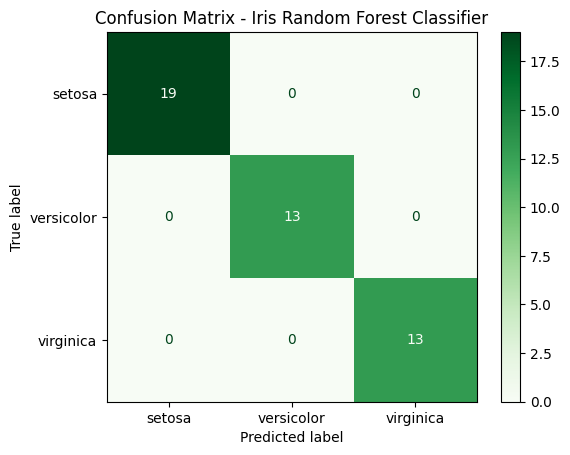

In [41]:
# Confusion Matrix
cm_iris = confusion_matrix(y_test, y_pred)
disp_iris = ConfusionMatrixDisplay(confusion_matrix=cm_iris, display_labels=iris.target_names)

plt.figure(figsize=(6, 5))
disp_iris.plot(cmap=plt.cm.Greens, values_format='d')
plt.title("Confusion Matrix - Iris Random Forest Classifier")
plt.show()

### Random Forest Diabetes Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Încărcarea datelor
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Standardizare
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separarea datelor
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def get_score_rf(x_train, y_train, n_estimators):
  """
  Antrenarea regresorului
  INPUT
  -----
  X: features
  y: labels
  n_estimators: numarul de arbori in random forest
  OUTPUT
  ------
  rf_clf: regresorul antrenat
  """
  rf_reg = RandomForestRegressor(n_estimators, random_state=42)
  rf_reg.fit(x_train, y_train)
  return rf_reg

# Predicție și Evaluare
y_pred = get_score_rf(x_train, y_train, 100).predict(x_test)
diabetes_r2 = r2_score(y_test, y_pred)
print(f"Diabetes Regression R2 Score: {diabetes_r2:.4f}")

Diabetes Regression R2 Score: 0.4407


#### Scatter Plot

In [43]:
def scatter_plot_random_forest_diabetes():
  plt.figure(figsize=(6, 6))
  plt.scatter(y_test, y_pred, alpha=0.6)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
  plt.xlabel("True Values")
  plt.ylabel("Predicted Values")
  plt.title("Diabetes - True vs Predicted")
  plt.grid(True)
  plt.show()

### Neural Network for Hand-Writen Digits Images

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [45]:
# Configurare
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Transformări
transform = transforms.Compose([transforms.ToTensor()])

In [46]:
# Încărcarea datelor
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)

# Rețea Neuronală
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.net(x)

In [47]:
# Lista cu optimizatori și rate de învățare
optimizers_dict = {
    'Adam': optim.Adam,
    'SGD': optim.SGD,
    'GD': lambda params, lr: optim.SGD(params, lr=lr)  # GD = SGD fără momentum
}
learning_rates = [0.01, 0.001, 0.0001]

# Tabel Markdown
markdown_table = "| Optimizer | Learning Rate | Accuracy | Time (s) |\n"
markdown_table += "|-----------|----------------|----------|----------|\n"

In [48]:
# Antrenare și evaluare pentru fiecare combinație de optimizer si learning_rate
for opt_name, opt_func in optimizers_dict.items():
    for lr in learning_rates:
        model = MNISTNet().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = opt_func(model.parameters(), lr=lr)

        start = time.time()
        for epoch in range(5):
            model.train()
            for data, target in train_loader:
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
        training_time = time.time() - start

        # Evaluare
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                preds = output.argmax(dim=1)
                correct += (preds == target).sum().item()
                total += target.size(0)

        accuracy = correct / total
        markdown_table += f"| {opt_name} | {lr} | {accuracy:.4f} | {training_time:.2f} |\n"
markdown_table

'| Optimizer | Learning Rate | Accuracy | Time (s) |\n|-----------|----------------|----------|----------|\n| Adam | 0.01 | 0.9669 | 66.17 |\n| Adam | 0.001 | 0.9729 | 51.23 |\n| Adam | 0.0001 | 0.9381 | 50.17 |\n| SGD | 0.01 | 0.9118 | 42.86 |\n| SGD | 0.001 | 0.6092 | 44.21 |\n| SGD | 0.0001 | 0.2065 | 44.15 |\n| GD | 0.01 | 0.9136 | 43.96 |\n| GD | 0.001 | 0.6448 | 44.29 |\n| GD | 0.0001 | 0.1199 | 45.23 |\n'

| Optimizer | Learning Rate | Accuracy | Time (s) |
|-----------|----------------|----------|----------|
| Adam | 0.01 | 0.9669 | 66.17 |
| Adam | 0.001 | 0.9729 | 51.23 |
| Adam | 0.0001 | 0.9381 | 50.17 |
| SGD | 0.01 | 0.9118 | 42.86 |
| SGD | 0.001 | 0.6092 | 44.21 |
| SGD | 0.0001 | 0.2065 | 44.15 |
| GD | 0.01 | 0.9136 | 43.96 |
| GD | 0.001 | 0.6448 | 44.29 |
| GD | 0.0001 | 0.1199 | 45.23 |
